In [25]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

In [26]:
# reading csv data
dfc = pd.read_csv("census_data.csv")

# First 5 rows
dfc.head()

,zip_code,city,state,CENSPCT_WATER,CENS_POP_DENSITY,CENS_HU_DENSITY,CENSPCT_POP_WHITE,CENSPCT_POP_BLACK,CENSPCT_POP_AMERIND,CENSPCT_POP_ASIAN,...,CENSPCT_ADULT_AGE5564,CENSPCT_ADULT_AGEGE65,CENS_POP_MEDAGE,CENS_HH_AVGSIZE,CENSPCT_HH_FAMILY,CENSPCT_HH_FAMILYHUSBWIFE,CENSPCT_HU_OCCUPIED,CENSPCT_HU_OWNED,CENSPCT_HU_RENTED,CENSPCT_HU_VACANTSEASONAL
0,2203,Boston,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11359,Bayside,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88103,Cannon Afb,NM,1.59,64.0,0.0,71.22,17.99,0.36,3.60,...,0.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96853,J B P H H,HI,0.00,4987.0,0.0,71.00,16.02,1.08,2.81,...,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23551,Norfolk,VA,0.00,2751.0,0.0,60.54,28.28,1.61,1.94,...,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dfc.isnull().sum()

zip_code                         0
city                             0
state                            0
CENSPCT_WATER                  154
CENS_POP_DENSITY               141
CENS_HU_DENSITY                154
CENSPCT_POP_WHITE              141
CENSPCT_POP_BLACK              141
CENSPCT_POP_AMERIND            141
CENSPCT_POP_ASIAN              141
CENSPCT_POP_PACISL             141
CENSPCT_POP_OTHRACE            141
CENSPCT_POP_MULTIRACE          141
CENSPCT_POP_HISPANIC         33096
CENSPCT_POP_MALES              141
CENSPCT_POP_AGELT18            231
CENSPCT_ADULT_AGE1824          231
CENSPCT_ADULT_AGE2534          141
CENSPCT_ADULT_AGE3544          141
CENSPCT_ADULT_AGE4554          141
CENSPCT_ADULT_AGE5564          141
CENSPCT_ADULT_AGEGE65          141
CENS_POP_MEDAGE                141
CENS_HH_AVGSIZE                314
CENSPCT_HH_FAMILY              314
CENSPCT_HH_FAMILYHUSBWIFE      314
CENSPCT_HU_OCCUPIED            305
CENSPCT_HU_OWNED               314
CENSPCT_HU_RENTED   

In [28]:
dfc.nunique()

zip_code                     33096
city                         17453
state                           52
CENSPCT_WATER                 2755
CENS_POP_DENSITY              5422
CENS_HU_DENSITY               3435
CENSPCT_POP_WHITE             6594
CENSPCT_POP_BLACK             4690
CENSPCT_POP_AMERIND           1619
CENSPCT_POP_ASIAN             1982
CENSPCT_POP_PACISL             331
CENSPCT_POP_OTHRACE           2600
CENSPCT_POP_MULTIRACE         1113
CENSPCT_POP_HISPANIC             0
CENSPCT_POP_MALES             2208
CENSPCT_POP_AGELT18           3336
CENSPCT_ADULT_AGE1824         2477
CENSPCT_ADULT_AGE2534         2535
CENSPCT_ADULT_AGE3544         1909
CENSPCT_ADULT_AGE4554         2055
CENSPCT_ADULT_AGE5564         2440
CENSPCT_ADULT_AGEGE65         3396
CENS_POP_MEDAGE                101
CENS_HH_AVGSIZE                 10
CENSPCT_HH_FAMILY             4656
CENSPCT_HH_FAMILYHUSBWIFE     5527
CENSPCT_HU_OCCUPIED           5286
CENSPCT_HU_OWNED              6936
CENSPCT_HU_RENTED   

In [29]:
#statistics
dfc.describe()

,zip_code,CENSPCT_WATER,CENS_POP_DENSITY,CENS_HU_DENSITY,CENSPCT_POP_WHITE,CENSPCT_POP_BLACK,CENSPCT_POP_AMERIND,CENSPCT_POP_ASIAN,CENSPCT_POP_PACISL,CENSPCT_POP_OTHRACE,...,CENSPCT_ADULT_AGE5564,CENSPCT_ADULT_AGEGE65,CENS_POP_MEDAGE,CENS_HH_AVGSIZE,CENSPCT_HH_FAMILY,CENSPCT_HH_FAMILYHUSBWIFE,CENSPCT_HU_OCCUPIED,CENSPCT_HU_OWNED,CENSPCT_HU_RENTED,CENSPCT_HU_VACANTSEASONAL
count,33096.000000,32942.000000,32955.000000,32942.000000,32955.000000,32955.000000,32955.000000,32955.000000,32955.000000,32955.000000,...,32955.000000,32955.000000,32955.000000,32782.000000,32782.000000,32782.000000,32791.000000,32782.000000,32782.000000,32782.000000
mean,49685.505590,3.247024,1274.007829,536.333343,83.232390,7.654828,1.905373,1.913353,0.101025,3.083522,...,13.691991,15.630596,41.298923,2.493533,68.302731,52.736803,83.608077,61.296401,22.334674,16.368986
std,27548.942235,7.994780,4988.299068,2362.904880,20.682434,15.755124,9.298552,5.019798,0.825195,6.101417,...,4.098157,6.828143,7.509510,0.574998,10.039095,11.710455,14.161619,16.536232,14.229425,14.095637
min,602.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26683.250000,0.080000,22.000000,10.000000,77.120000,0.240000,0.140000,0.130000,0.000000,0.220000,...,11.540000,11.900000,37.000000,2.000000,64.420000,47.120000,80.465000,53.860000,13.330000,7.500000
50%,49748.500000,0.610000,82.000000,37.000000,92.270000,0.940000,0.340000,0.440000,0.000000,0.790000,...,13.360000,14.960000,41.000000,2.000000,69.590000,54.250000,88.140000,64.350000,18.750000,11.850000
75%,72126.250000,2.440000,672.000000,274.000000,97.100000,6.390000,0.750000,1.400000,0.050000,2.810000,...,15.470000,18.360000,45.000000,3.000000,73.990000,60.000000,92.500000,72.380000,27.100000,19.510000
max,99929.000000,94.570000,172372.000000,91628.000000,100.000000,100.000000,100.000000,100.000000,48.890000,88.680000,...,66.670000,100.000000,119.000000,9.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.110000


<AxesSubplot:xlabel='state'>

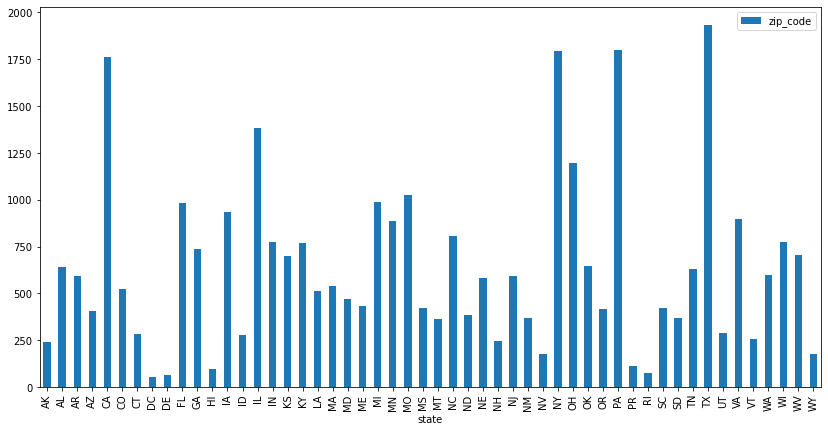

In [30]:
#no of zipcodes in each state
state = dfc['state']
zip_code = dfc['zip_code']
states = pd.DataFrame({ 'zip_code': zip_code, 'state': state})
states.groupby('state').count().plot.bar(figsize=(14,7))

In [31]:
#52 states in USA
len(states['state'].unique())

52

In [32]:
#no of unique cities in each state
city = dfc['city'].unique()
city=city.tolist()
len(city)

17453

In [33]:
CENS_POP_DENSITY = dfc['CENS_POP_DENSITY']
CENS_POP_DENSITY = pd.DataFrame({ 'state': state, 'CENS_POP_DENSITY':CENS_POP_DENSITY })
CENS_POP_DENSITY = CENS_POP_DENSITY.dropna()
len(CENS_POP_DENSITY)

32955

<AxesSubplot:ylabel='state'>

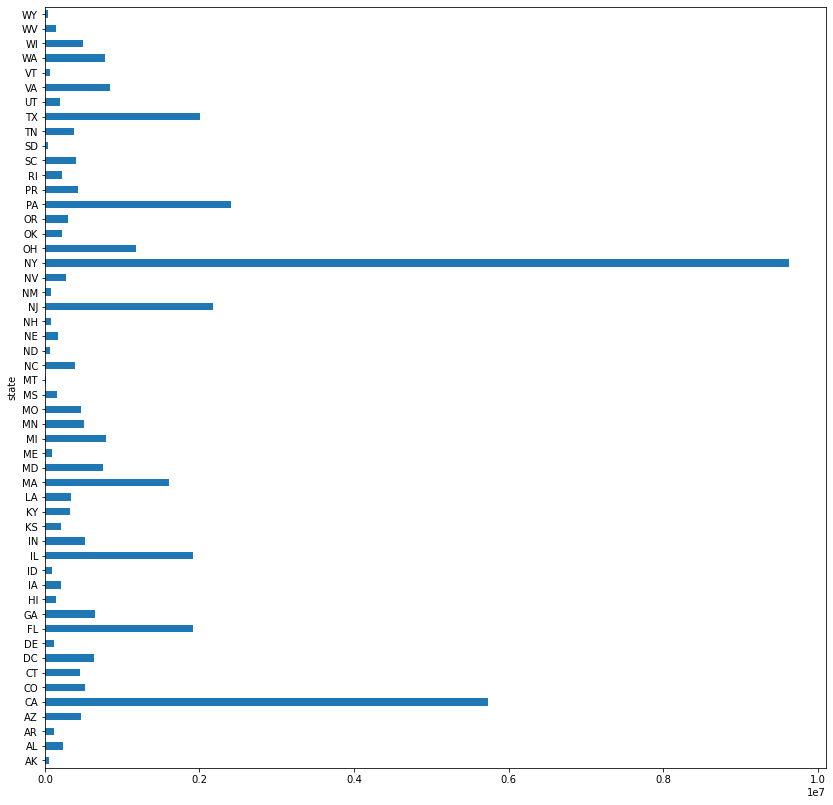

In [34]:
#Population Density for all states
c = CENS_POP_DENSITY.groupby(['state'])['CENS_POP_DENSITY'].sum()
c.plot.barh(figsize=(14,14))

<AxesSubplot:ylabel='CENS_POP_DENSITY'>

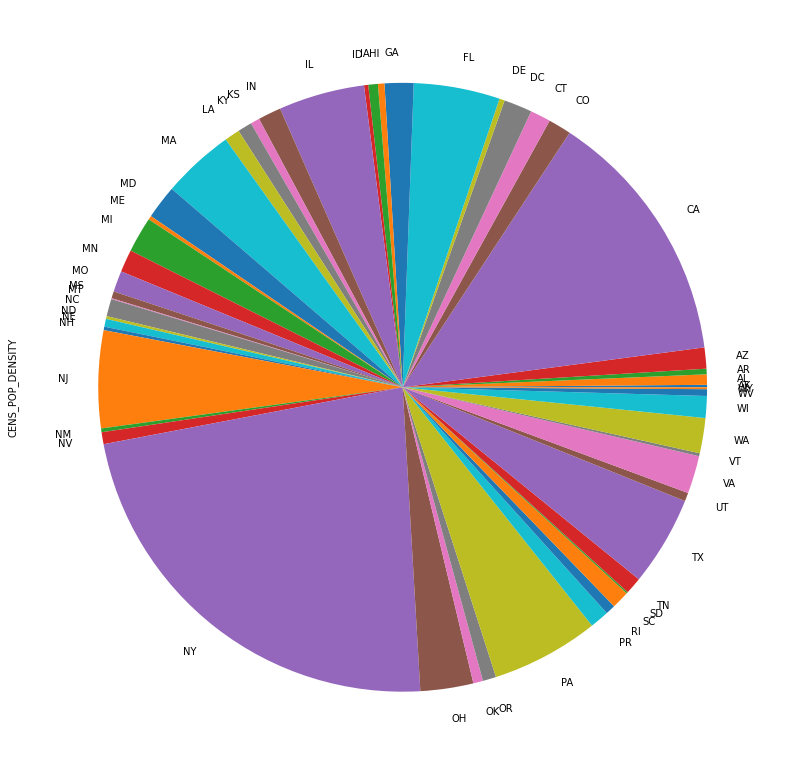

In [35]:
c.plot.pie(figsize=(14,14))

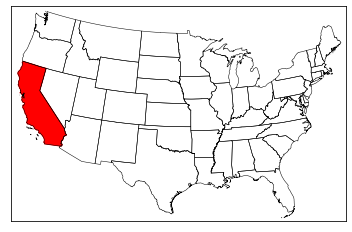

In [36]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plot.gca() # get current axes instance

# get Texas and draw the filled polygon
seg = map.states[state_names.index('California')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plot.show()

Text(11788880.571661899, 20495687.174096927, 'New York')

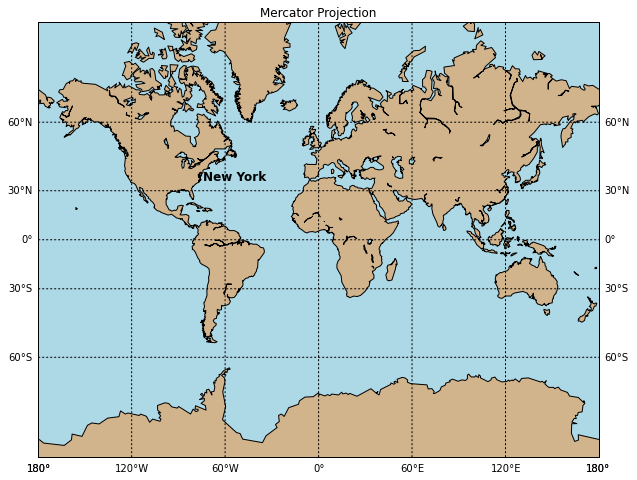

In [37]:
nylat = 40.78; nylon = -73.98
fig = plot.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plot.title("Mercator Projection")

x, y = m(nylon, nylat)  
plot.text(x, y, 'New York',fontsize=12,fontweight='bold',ha='left',va='top',color='k')


<AxesSubplot:xlabel='state'>

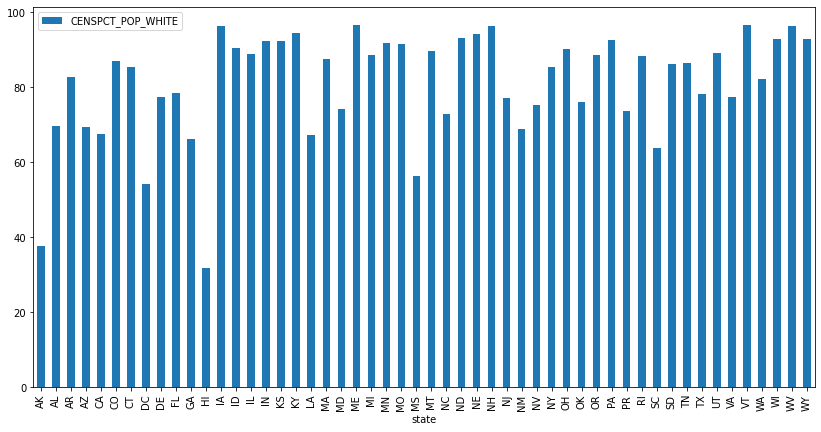

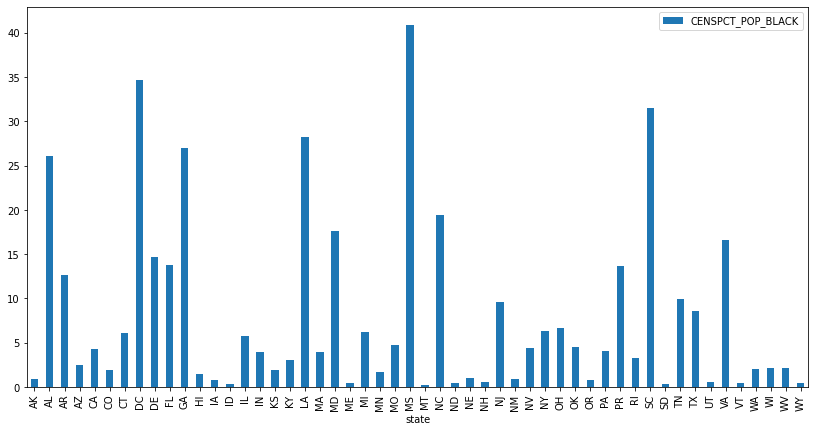

In [38]:
# Visualization for Percentage of White Population

CENSPCT_POP_WHITE = dfc['CENSPCT_POP_WHITE']
CENSPCT_POP_WHITE = pd.DataFrame({ 'state': state, 'CENSPCT_POP_WHITE':CENSPCT_POP_WHITE })
CENSPCT_POP_WHITE = CENSPCT_POP_WHITE.dropna()
len(CENSPCT_POP_WHITE)

CENSPCT_POP_BLACK = dfc['CENSPCT_POP_BLACK']
CENSPCT_POP_BLACK = pd.DataFrame({ 'state': state, 'CENSPCT_POP_BLACK':CENSPCT_POP_BLACK })
CENSPCT_POP_BLACK = CENSPCT_POP_BLACK.dropna()


CENSPCT_POP_WHITE.groupby('state').mean().plot.bar( figsize=(14,7))
CENSPCT_POP_BLACK.groupby('state').mean().plot.bar(figsize=(14,7))

In [39]:
import matplotlib.pyplot as plt

In [40]:
cols = ['CENSPCT_POP_WHITE','CENSPCT_POP_BLACK','CENSPCT_POP_AMERIND','CENSPCT_POP_ASIAN','CENSPCT_POP_PACISL','CENSPCT_POP_OTHRACE','CENSPCT_POP_MULTIRACE']

In [41]:
dfp = dfc[cols].dropna()

<AxesSubplot:xlabel='state'>

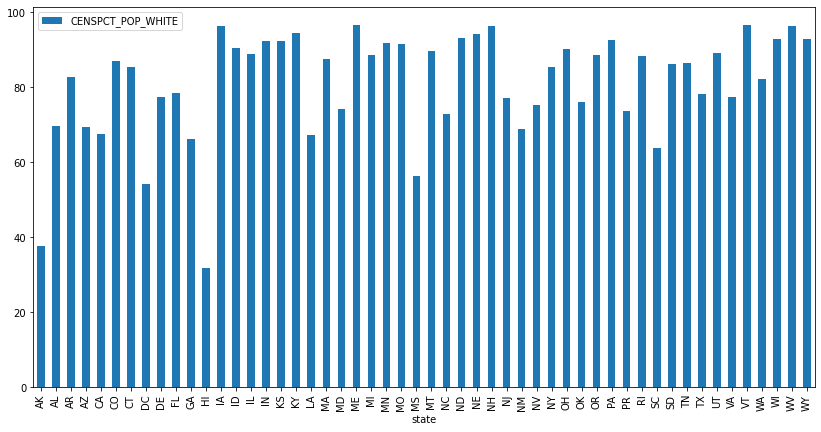

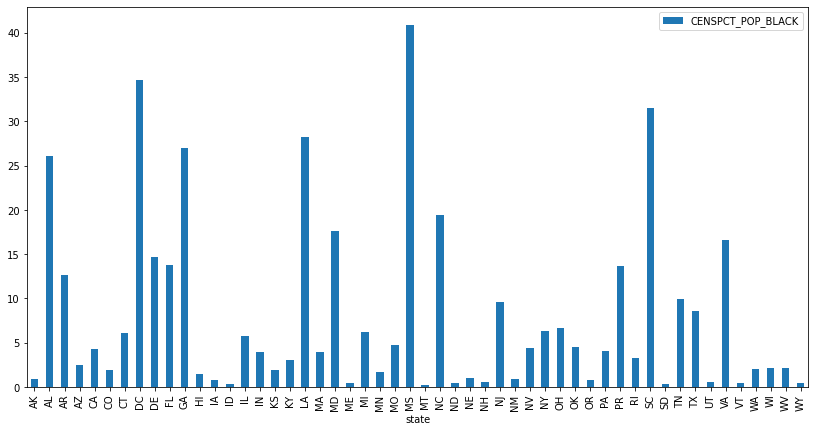

In [42]:
CENSPCT_POP_BLACK = dfc['CENSPCT_POP_BLACK']
CENSPCT_POP_BLACK = pd.DataFrame({ 'state': state, 'CENSPCT_POP_BLACK':CENSPCT_POP_BLACK })
CENSPCT_POP_BLACK = CENSPCT_POP_BLACK.dropna()


CENSPCT_POP_WHITE.groupby('state').mean().plot.bar(figsize=(14,7))
CENSPCT_POP_BLACK.groupby('state').mean().plot.bar(figsize=(14,7))

In [47]:
cols = ['CENSPCT_POP_WHITE','CENSPCT_POP_BLACK','CENSPCT_POP_AMERIND','CENSPCT_POP_ASIAN','CENSPCT_POP_PACISL','CENSPCT_POP_OTHRACE','CENSPCT_POP_MULTIRACE']
def filter_rows(Statename):
    dff = dfc[(dfc["state"] == Statename) ]
    popw = dff['CENSPCT_POP_WHITE'].mean()
    popb = dff['CENSPCT_POP_BLACK'].mean()
    popa = dff['CENSPCT_POP_AMERIND'].mean()
    popas = dff['CENSPCT_POP_ASIAN'].mean()
    poppac = dff['CENSPCT_POP_PACISL'].mean()
    popo = dff['CENSPCT_POP_OTHRACE'].mean()
    popm = dff['CENSPCT_POP_MULTIRACE'].mean()
    return dff,[popw,popb,popa,popas,poppac,popo,popm]
dff,lis=filter_rows('FL')
df = pd.DataFrame(lis, index=['popwhite','CENSPCT_POP_BLACK','CENSPCT_POP_AMERIND','CENSPCT_POP_ASIAN','CENSPCT_POP_PACISL','CENSPCT_POP_OTHRACE','CENSPCT_POP_MULTIRACE'])
print(lis)

[78.3018940936863, 13.793014256619143, 0.4316802443991856, 1.901649694501022, 0.06321792260692467, 3.2558859470468446, 2.2526985743380816]


array([<AxesSubplot:ylabel='0'>], dtype=object)

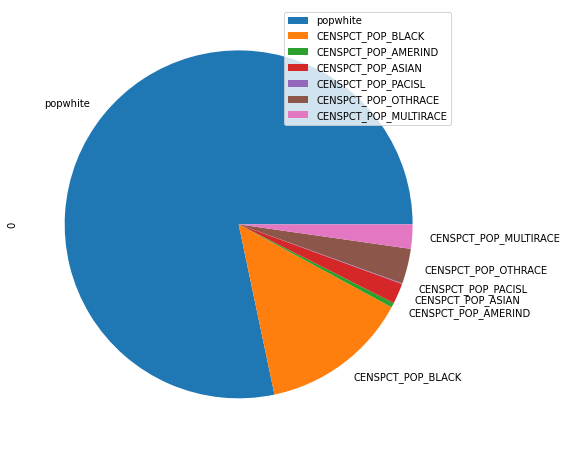

In [48]:
# Percentage of Population of State according to its demographics
df.plot(kind='pie', subplots=True, figsize=(8, 8))

In [23]:
col1=['CENSPCT_POP_MALES','CENSPCT_POP_AGELT18','CENSPCT_ADULT_AGE1824','CENSPCT_ADULT_AGE2534','CENSPCT_ADULT_AGE3544','CENSPCT_ADULT_AGE4554','CENSPCT_ADULT_AGE5564','CENSPCT_ADULT_AGEGE65','CENS_POP_MEDAGE']
dft = dfc[col1]
dft = dft.dropna()

#Percentage of Population that are males
males = dft['CENSPCT_POP_MALES'].mean()
print(f"Percentage of Population that are males: {males}")
print(f"Percentage of Population that are Females: {100-males}")

CENPCT_POP_AGELT18 = dft['CENSPCT_POP_AGELT18'].mean()
CENPCT_ADULT_AGE1824 = dft['CENSPCT_ADULT_AGE1824'].mean()
CENPCT_ADULT_AGE2534 = dft['CENSPCT_ADULT_AGE2534'].mean()
CENPCT_ADULT_AGE3544 = dft['CENSPCT_ADULT_AGE3544'].mean()
CENPCT_ADULT_AGE4554 = dft['CENSPCT_ADULT_AGE4554'].mean()
CENPCT_ADULT_AGE5564 = dft['CENSPCT_ADULT_AGE5564'].mean()
CENPCT_ADULT_AGEGE65 = dft['CENSPCT_ADULT_AGEGE65'].mean()

print(f"Percentage of Population that are Under 18: {CENPCT_POP_AGELT18}")
print(f"Percentage of Population that are 18-24: {CENPCT_ADULT_AGE1824}")
print(f"Percentage of Population that are 25-34: {CENPCT_ADULT_AGE2534}")
print(f"Percentage of Population that are 35-44: {CENPCT_ADULT_AGE3544}")
print(f"Percentage of Population that are 45-54: {CENPCT_ADULT_AGE4554}")
print(f"Percentage of Population that are 55-64: {CENPCT_ADULT_AGE5564}")
print(f"Percentage of Population that are 65 and above: {CENPCT_ADULT_AGEGE65}")


Percentage of Population that are males: 50.168352350524714
Percentage of Population that are Females: 49.831647649475286
Percentage of Population that are Under 18: 22.79226837060709
Percentage of Population that are 18-24: 8.752256503879504
Percentage of Population that are 25-34: 11.31468005476948
Percentage of Population that are 35-44: 12.384505705157531
Percentage of Population that are 45-54: 15.527214057507932
Percentage of Population that are 55-64: 13.679387798569845
Percentage of Population that are 65 and above: 15.5496753385059


array([<AxesSubplot:ylabel='0'>], dtype=object)

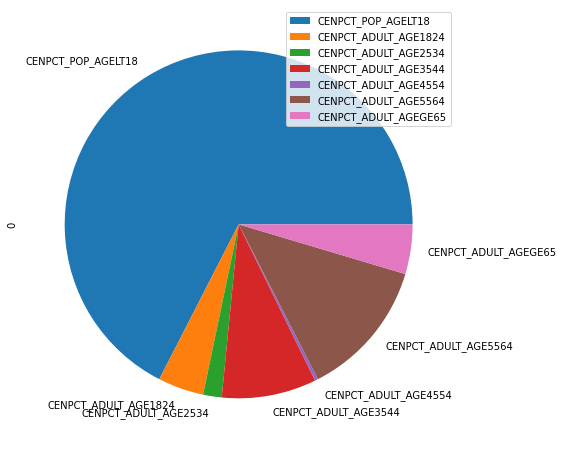

In [24]:
rt = [CENPCT_POP_AGELT18, CENPCT_ADULT_AGE1824, CENPCT_ADULT_AGE2534, CENPCT_ADULT_AGE3544, CENPCT_ADULT_AGE4554, CENPCT_ADULT_AGE5564, CENPCT_ADULT_AGEGE65]
df8 = pd.DataFrame(lis, index=['CENPCT_POP_AGELT18','CENPCT_ADULT_AGE1824','CENPCT_ADULT_AGE2534','CENPCT_ADULT_AGE3544','CENPCT_ADULT_AGE4554','CENPCT_ADULT_AGE5564','CENPCT_ADULT_AGEGE65'])
df8.plot(kind='pie', subplots=True, figsize=(8, 8))